# Masking and Social Distancing

This notebook is dedicated how a combination of masking and single interval social distancing are effective in stopping the spread of an epidemic.

## Setup

In [1]:
using DifferentialEquations, Plots, Plots.PlotMeasures, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

## Utility functions

In [2]:
# change plot fonts
bplot(p, s) = plot!(p, titlefont=font(s, "Times"), xguidefontsize=s-4
    , ytickfont=font(s-4, "Times"), margin=8mm, yguidefontsize=s-4
    , xtickfont = font(s-4, "Times"), legendfont = font(s-4, "Times"))

# this function will generate a T period of social distancing at time t0
sinput(t, ts, td) = if (t-ts<0 || t-ts-td>0) 0 else 1 end

sinput (generic function with 1 method)

# $SIR$ Model

## Basics

In [17]:
"figures/mask_"*string(0.3)*"_heatmap.svg"

"figures/mask_0.3_heatmap.svg"

In [4]:
# model description
function SIR(dx,x,p,t)
    b, db, g, ts, td = p
    u = b - db.*sinput(t, ts, td)
    dx[1] = -u*x[1]*x[2]
    dx[2] = u*x[1]*x[2] - g*x[2]
    dx[3] = g*x[2]
end

function test(β)
    # change contact rates
    beta  = β
    bdiff = β/2
    gamma = 0.09
    u0 = [1-1e-3, 1e-3, 0.]
    p  = [beta, bdiff, gamma, 0, 0]
    
    # ode solver
    alg = BS3()
    # solve the ode problem
    tspan = (0.0, 150)
    prob  = ODEProblem(SIR, u0, tspan, p)
    sol   = solve(prob, alg, reltol=1e-8, abstol=1e-8)
    timen = sol.t[argmax(sol[2,:])] # time of the peak
    
    # range of the quarantine starting time and duration
    Trng = 0:Int(floor(100/β)) 
    trng = 0:Int(floor(10/β))
    data = zeros(size(Trng,1), size(trng,1))
    time = data
    
    for i = 1:size(Trng,1)
        for j = 1:size(trng,1)
            # solve the ode problem
            p[4:5] = [trng[j], Trng[i]]
            prob = ODEProblem(SIR, u0, tspan, p)
            sol  = solve(prob, alg, reltol=1e-8, abstol=1e-8)
            data[i,j] = maximum(sol[2,:])
        end
    end
    
    p1 = heatmap(trng, Trng, data,c=cgrad([:white, :blue]),
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I)")
    p1 = plot!(p1, [Int(round(timen))], seriestype="vline", line=:dash, linewidth=6, legend=:false)
    p1 = bplot(p1, 16)
    savefig(p1, "figures/mask_"*string(\)*"_heatmap.svg")
    savefig(p1, "figures/mask_"*string(0.3)*"_heatmap.png")

end





# range of the quarantine starting time and duration
Trng = 0:150 
trng = 0:40
data = zeros(size(Trng,1), size(trng,1))
time = data


p1 = heatmap(trng, Trng, data,c=cgrad([:white, :blue]),
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I)")
p1 = plot!(p1, [Int(round(timen))], seriestype="vline", line=:dash, linewidth=6, legend=:false)
p1 = bplot(p1, 16)
savefig(p1, "figures/mask_heatmap.svg")
savefig(p1, "figures/mask_heatmap.png")

p2 = contour(trng, Trng, data,c=cgrad([:white, :blue]), colorbar = false,
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I)", contour_labels = true, linewidth=1, 
    levels=[0.05, 0.1, 0.15, 0.2, 0.25, .3])
x = 0:36; y = -2*x.+72
p2 = plot!(p2, x, y, linewidth=6, line=:dash, legend=:false)
p2 = bplot(p2, 16)
savefig(p2, "figures/mask_contour.svg")

fig = plot(p1, p2, layout=(1,2), size=(960,470))
savefig(fig, "figures/mask.svg")
savefig(fig, "figures/mask.png")

47.05265359276145

# Mask or mild

In [ ]:
# model description
function SIR(dx,x,p,t)
    b, db, g, ts, td = p
    u = b - db.*sinput(t, ts, td)
    dx[1] = -u*x[1]*x[2]
    dx[2] = u*x[1]*x[2] - g*x[2]
    dx[3] = g*x[2]
end

# change contact rates
beta  = 0.3
bdiff = 0.15
gamma = 0.09
u0 = [1-1e-3, 1e-3, 0.]
p  = [beta, bdiff, gamma, 0, 0]

# ode solver
alg = BS3()
# solve the ode problem
tspan = (0.0, 150)
prob  = ODEProblem(SIR, u0, tspan, p)
sol   = solve(prob, alg, reltol=1e-8, abstol=1e-8)
timen = sol.t[argmax(sol[2,:])] # time of the peak

# range of the quarantine starting time and duration
Trng = 0:150 
trng = 0:40
data = zeros(size(Trng,1), size(trng,1))
time = data

for i = 1:size(Trng,1)
    for j = 1:size(trng,1)
        # solve the ode problem
        p[4:5] = [trng[j], Trng[i]]
        prob = ODEProblem(SIR, u0, tspan, p)
        sol  = solve(prob, alg, reltol=1e-8, abstol=1e-8)
        data[i,j] = maximum(sol[2,:])
    end
end

p1 = heatmap(trng, Trng, data,c=cgrad([:white, :blue]),
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I)")
p1 = plot!(p1, [Int(round(timen))], seriestype="vline", line=:dash, linewidth=6, legend=:false)
p1 = bplot(p1, 16)
savefig(p1, "figures/mask_heatmap.svg")
savefig(p1, "figures/mask_heatmap.png")

p2 = contour(trng, Trng, data,c=cgrad([:white, :blue]), colorbar = false,
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I)", contour_labels = true, linewidth=1, 
    levels=[0.05, 0.1, 0.15, 0.2, 0.25, .3])
x = 0:36; y = -2*x.+72
p2 = plot!(p2, x, y, linewidth=6, line=:dash, legend=:false)
p2 = bplot(p2, 16)
savefig(p2, "figures/mask_contour.svg")

fig = plot(p1, p2, layout=(1,2), size=(960,470))
savefig(fig, "figures/mask.svg")
savefig(fig, "figures/mask.png")

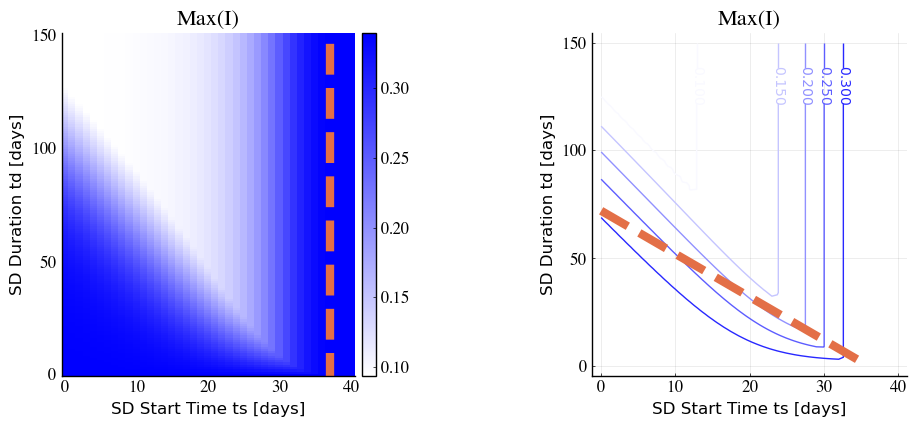

In [12]:
# model description
function SIR(dx,x,p,t)
    b, db, g, ts, td = p
    u = b - db.*sinput(t, ts, td)
    dx[1] = -u*x[1]*x[2]
    dx[2] = u*x[1]*x[2] - g*x[2]
    dx[3] = g*x[2]
end

# change contact rates
beta  = 0.3
bdiff = 0.15
gamma = 0.09
u0 = [1-1e-3, 1e-3, 0.]
p  = [beta, bdiff, gamma, 0, 0]

# ode solver
alg = BS3()
# solve the ode problem
tspan = (0.0, 150)
prob  = ODEProblem(SIR, u0, tspan, p)
sol   = solve(prob, alg, reltol=1e-8, abstol=1e-8)
timen = sol.t[argmax(sol[2,:])] # time of the peak

# range of the quarantine starting time and duration
Trng = 0:150 
trng = 0:40
data = zeros(size(Trng,1), size(trng,1))
time = data

for i = 1:size(Trng,1)
    for j = 1:size(trng,1)
        # solve the ode problem
        p[4:5] = [trng[j], Trng[i]]
        prob = ODEProblem(SIR, u0, tspan, p)
        sol  = solve(prob, alg, reltol=1e-8, abstol=1e-8)
        data[i,j] = maximum(sol[2,:])
    end
end

p1 = heatmap(trng, Trng, data,c=cgrad([:white, :blue]),
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I)")
p1 = plot!(p1, [Int(round(timen))], seriestype="vline", line=:dash, linewidth=6, legend=:false)
p1 = bplot(p1, 16)
savefig(p1, "figures/mask_heatmap.svg")
savefig(p1, "figures/mask_heatmap.png")

p2 = contour(trng, Trng, data,c=cgrad([:white, :blue]), colorbar = false,
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I)", contour_labels = true, linewidth=1, 
    levels=[0.05, 0.1, 0.15, 0.2, 0.25, .3])
x = 0:36; y = -2*x.+72
p2 = plot!(p2, x, y, linewidth=6, line=:dash, legend=:false)
p2 = bplot(p2, 16)
savefig(p2, "figures/mask_contour.svg")

fig = plot(p1, p2, layout=(1,2), size=(960,470))
savefig(fig, "figures/mask.svg")
savefig(fig, "figures/mask.png")

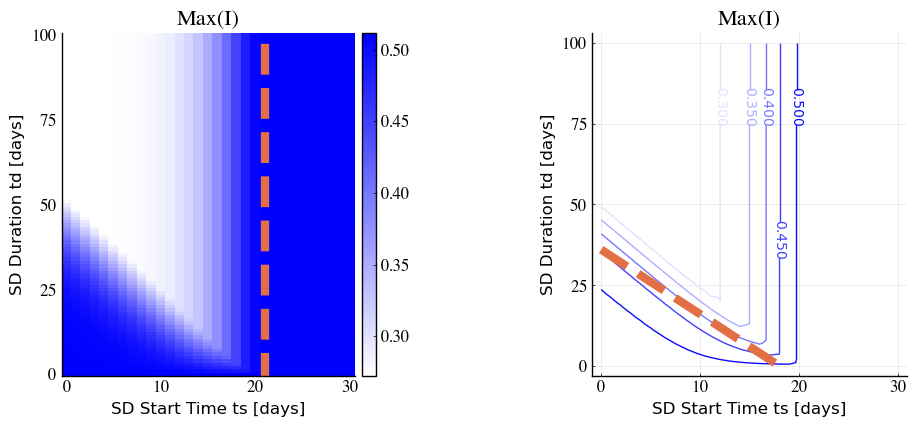

In [10]:
# model description
function SIR(dx,x,p,t)
    b, db, g, ts, td = p
    u = b - db.*sinput(t, ts, td)
    dx[1] = -u*x[1]*x[2]
    dx[2] = u*x[1]*x[2] - g*x[2]
    dx[3] = g*x[2]
end

# change contact rates
beta  = 0.5
bdiff = 0.25
gamma = 0.09
u0 = [1-1e-3, 1e-3, 0.]
p  = [beta, bdiff, gamma, 0, 0]

# ode solver
alg = BS3()
# solve the ode problem
tspan = (0.0, 150)
prob  = ODEProblem(SIR, u0, tspan, p)
sol   = solve(prob, alg, reltol=1e-8, abstol=1e-8)
timen = sol.t[argmax(sol[2,:])] # time of the peak

# range of the quarantine starting time and duration
Trng = 0:100 
trng = 0:30
data = zeros(size(Trng,1), size(trng,1))
time = data

for i = 1:size(Trng,1)
    for j = 1:size(trng,1)
        # solve the ode problem
        p[4:5] = [trng[j], Trng[i]]
        prob = ODEProblem(SIR, u0, tspan, p)
        sol  = solve(prob, alg, reltol=1e-8, abstol=1e-8)
        data[i,j] = maximum(sol[2,:])
    end
end

p1 = heatmap(trng, Trng, data,c=cgrad([:white, :blue]),
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I)")
p1 = plot!(p1, [Int(round(timen))], seriestype="vline", line=:dash, linewidth=6, legend=:false)
p1 = bplot(p1, 16)
savefig(p1, "figures/mask_heatmap.svg")
savefig(p1, "figures/mask_heatmap.png")

p2 = contour(trng, Trng, data,c=cgrad([:white, :blue]), colorbar = false,
    xlabel="SD Start Time ts [days]", ylabel="SD Duration td [days]",
    title="Max(I)", contour_labels = true, linewidth=1, 
    levels=[0.25, 0.3, 0.35, 0.4, 0.45, .5])
x = 0:18; y = -2*x.+36
p2 = plot!(p2, x, y, linewidth=6, line=:dash, legend=:false)
p2 = bplot(p2, 16)
savefig(p2, "figures/mask_contour.svg")

fig = plot(p1, p2, layout=(1,2), size=(960,470))
savefig(fig, "figures/mask.svg")
savefig(fig, "figures/mask.png")

# Adjourn

In [5]:
using Dates
println("mahdiar")
Dates.format(now(), "Y/U/d HH:MM")  

mahdiar


"2021/February/26 15:17"